<a href="https://colab.research.google.com/github/s-ryuri/TIL/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%EC%82%AC%EA%B8%B0%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/파이썬머신러닝완벽가이드

Mounted at /content/drive
/content/drive/MyDrive/파이썬머신러닝완벽가이드


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import warnings
#ignore warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic') 
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

font family:  ['Noto Sans KR']


In [3]:
card_df = pd.read_csv('creditcard.csv')

In [4]:
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaler',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1,inplace = True)
    return df_copy

def get_train_test_dataset(df = None):
    df_copy = get_preprocessed_df(df)
    x_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]

    x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,test_size = 0.3,random_state = 0,stratify = y_target)
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

In [33]:
print('학습 데이티 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이티 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
print('accuracy : ',accuracy_score(lr_pred,y_test))

accuracy :  0.9991807403766253


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [27]:
def get_model_train_eval(model,ftr_train = None,ftr_test = None,tgt_train = None,tgt_test =None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [28]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000,num_leavers = 64,n_jobs = -1,boost_from_average = False)


In [29]:
get_model_train_eval(lgbm_clf,ftr_train = x_train,ftr_test = x_test,tgt_train = y_train,tgt_test = y_test)

오차 행렬
[[85291     4]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9655, 재현율: 0.7568,    F1: 0.8485, AUC:0.9772


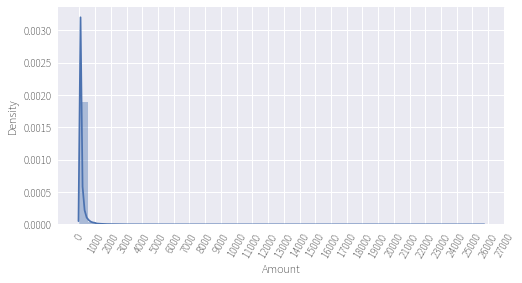

In [31]:
plt.figure(figsize = (8,4))
plt.xticks(range(0,30000,1000),rotation = 60)
sns.distplot(card_df['Amount'])

In [36]:
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

lf_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train = x_train,ftr_test = x_test,tgt_train = y_train,tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators= 1000,num_leaves= 64,n_jobs=-1)
get_model_train_eval(lgbm_clf ,ftr_train = x_train,ftr_test = x_test,tgt_train = y_train,tgt_test = y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85148   147]
 [  147     1]]
정확도: 0.9966, 정밀도: 0.0068, 재현율: 0.0068,    F1: 0.0068, AUC:0.5024


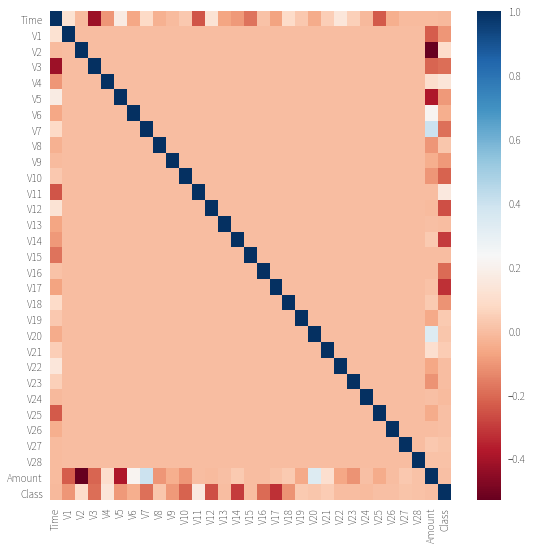

In [37]:
plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap = 'RdBu')

In [46]:
def get_outlier(df = None,column = None,weight = 1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [47]:
outlier_index = get_outlier(df = card_df, column = 'V14',weight = 1.5)
print('이상치 데이터 인덱스 : ',outlier_index)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [48]:
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1,inplace = True)
    outlier_index = get_outlier(df = df_copy,column = 'V14',weight = 1.5)
    df_copy.drop(outlier_index, axis = 0,inplace = True)
    return df_copy

x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)
print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf,ftr_train = x_train,ftr_test = x_test,tgt_train = y_train,tgt_test = y_test)



로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743


In [49]:
print('LightGBM 회귀 예측 성능')
get_model_train_eval(lgbm_clf,ftr_train = x_train,ftr_test = x_test,tgt_train = y_train,tgt_test = y_test)

LightGBM 회귀 예측 성능
오차 행렬
[[85179   116]
 [  117    29]]
정확도: 0.9973, 정밀도: 0.2000, 재현율: 0.1986,    F1: 0.1993, AUC:0.5986


In [50]:
# SMOT는 앞에서 설치한 imbalanced-learn 패키지의 SMOTE 클래스를 이용해서 간단하게 구현 가능하고 SMOT는 반드시 학습 데이터 세트만 오버 샘플링 해야한다.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

x_train_over,y_train_over = smote.fit_sample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ',x_train.shape,y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ',x_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포 : 
 1    199020
0    199020
dtype: int64


In [51]:
print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf,ftr_train = x_train_over,ftr_test = x_test,tgt_train = y_train_over,tgt_test = y_test)


로지스틱 회귀 예측 성능
오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [52]:
print('LightGBM 회귀 예측 성능')
get_model_train_eval(lgbm_clf,ftr_train = x_train_over,ftr_test = x_test,tgt_train = y_train_over,tgt_test = y_test)

LightGBM 회귀 예측 성능
오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9789
